In [65]:
import tweepy
import sys
import cnfg
import pymongo
import pandas as pd
import dateutil.parser
import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle
import time
from collections import defaultdict
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
#Steps 1 and 2:

#--OAuth Authentication--aka getting permission to make API calls#
#creating an OAuthHandler instance
config = cnfg.load(".twitter_config")

auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])
auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

api = tweepy.API(auth)

#print out the name of the account as a test.
print api.me().name

yong cho


In [3]:
class CustomStreamListener2(tweepy.StreamListener):
    def __init__(self):
        self.api = api
        super(tweepy.StreamListener, self).__init__()
        
        self.db = pymongo.MongoClient().Cubs
        
    def on_connect(self):
        #Called when the connection is made
        print("Connected to the streaming server.")
    
    def on_status(self, status):
        
        data = defaultdict(list)
        
        data['text'] = status.text
        data['created_at'] = status.created_at
        data['geo'] = status.geo
        data['source'] = status.source
        
        data['user'] = status.user.screen_name
        
        if status.entities['hashtags']:
            for hashtag in status.entities['hashtags']:
                data['hashtag'].append(hashtag['text'])
        else:
            data['hashtag'] = None

        print status.text, '\n'
        
        self.db.ThursTweets.insert(data)

    def on_error(self, status_code):
        print >> sys.stderr, 'Encountered error with status code:', status_code
        time.sleep(5)
        return True # Don't kill the stream

    def on_timeout(self):
        print >> sys.stderr, 'Timeout...'
        return True # Don't kill the stream

In [ ]:
while True:
    try:
        sapi2 = tweepy.streaming.Stream(auth, CustomStreamListener2())
        sapi2.filter(track=['cubs'])
    except Exception as e:
        print "Had an error,", e
        pass

Connected to the streaming server.
$50 on U8.5 Cubs game @ 2

@nickgiglioo 

If you catch a home run ball and throw it back not only are you an idiot, but you deserve to root for the #Cubs . #baseball 

Protect their cubs, that's what mother bears do, Stay out of their space if u don't want to get mauled...Just sayin https://t.co/IKeJESdf7S 

@MLBrendan @alarre1 @JeffPassan Cubs are a national team, it would do way better than the Nationals or Giants in the game. 

RT @stoolpresidente: LOL. @BarstoolBigCat @NESN: Cubs are good. Rizzo + Theo Epstein celebrated with karaoke. http://t.co/k8mpTctNYF http:/… 

#LetsGo #LetsGive https://t.co/uNz6uM5IQt 

Cub Tracks Is On A Roll http://t.co/WNJamwkDzc #Cubs #mlb 

@nsperry2 @CarrieMuskat Looked it up today, Sox vs Cubs series has gone to the Sox 10 times, Cubs 4 times, split 4 times 

RT @MLBONFOX: The #BlueJays, #Mets &amp; #Cubs have gone a collective 26-3 since August 2nd

How'd it happen? http://t.co/NQUkKLVYEp http://t.c… 

RT @MLBONFOX:

In [4]:
tweets = pymongo.MongoClient().Cubs.ThursTweets
cursor = tweets.find()
DF = pd.DataFrame(list(cursor))
print len(DF)

22396


In [5]:
cubs_tweets = pymongo.MongoClient().Cubs.ThursTweets
cursor = cubs_tweets.find()
cubsDF = pd.DataFrame(list(cursor))

In [6]:
cubsDF.head()

,_id,created_at,geo,hashtag,source,text,user
0,55ccdd80b187a80779b0bc06,2015-08-13 18:10:06,None,None,Twitter for iPhone,$50 on U8.5 Cubs game @ 2\n\n@nickgiglioo,PPBets365
1,55ccdd80b187a80779b0bc07,2015-08-13 18:10:07,None,"[Cubs, baseball]",Echofon,If you catch a home run ball and throw it back...,keith_saunders
2,55ccdd82b187a80779b0bc08,2015-08-13 18:10:09,None,None,Twitter Web Client,"Protect their cubs, that's what mother bears d...",lthearted1
3,55ccdd86b187a80779b0bc09,2015-08-13 18:10:14,None,None,Twitter for iPhone,@MLBrendan @alarre1 @JeffPassan Cubs are a nat...,jw_mike
4,55ccdd86b187a80779b0bc0a,2015-08-13 18:10:14,None,None,Twitter for iPhone,RT @stoolpresidente: LOL. @BarstoolBigCat @NES...,patowens77


In [7]:
cleanDF = cubsDF[['created_at','text','hashtag','user','geo','source']]
cleanDF.head()

,created_at,text,hashtag,user,geo,source
0,2015-08-13 18:10:06,$50 on U8.5 Cubs game @ 2\n\n@nickgiglioo,None,PPBets365,None,Twitter for iPhone
1,2015-08-13 18:10:07,If you catch a home run ball and throw it back...,"[Cubs, baseball]",keith_saunders,None,Echofon
2,2015-08-13 18:10:09,"Protect their cubs, that's what mother bears d...",None,lthearted1,None,Twitter Web Client
3,2015-08-13 18:10:14,@MLBrendan @alarre1 @JeffPassan Cubs are a nat...,None,jw_mike,None,Twitter for iPhone
4,2015-08-13 18:10:14,RT @stoolpresidente: LOL. @BarstoolBigCat @NES...,None,patowens77,None,Twitter for iPhone


In [8]:
cleanDF['created_at'] = pd.to_datetime(pd.Series(cleanDF['created_at']))
cleanDF.set_index('created_at', drop=False, inplace=True)
cleanDF.head()

/Users/yongcho822/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,created_at,text,hashtag,user,geo,source
created_at,,,,,,
2015-08-13 18:10:06,2015-08-13 18:10:06,$50 on U8.5 Cubs game @ 2\n\n@nickgiglioo,None,PPBets365,None,Twitter for iPhone
2015-08-13 18:10:07,2015-08-13 18:10:07,If you catch a home run ball and throw it back...,"[Cubs, baseball]",keith_saunders,None,Echofon
2015-08-13 18:10:09,2015-08-13 18:10:09,"Protect their cubs, that's what mother bears d...",None,lthearted1,None,Twitter Web Client
2015-08-13 18:10:14,2015-08-13 18:10:14,@MLBrendan @alarre1 @JeffPassan Cubs are a nat...,None,jw_mike,None,Twitter for iPhone
2015-08-13 18:10:14,2015-08-13 18:10:14,RT @stoolpresidente: LOL. @BarstoolBigCat @NES...,None,patowens77,None,Twitter for iPhone


In [9]:
import pytz
eastern = pytz.timezone('US/Eastern')
cleanDF.index = cleanDF.index.tz_localize('GMT').tz_convert(eastern)

In [10]:
cleanDF.head()

,created_at,text,hashtag,user,geo,source
created_at,,,,,,
2015-08-13 14:10:06-04:00,2015-08-13 18:10:06,$50 on U8.5 Cubs game @ 2\n\n@nickgiglioo,None,PPBets365,None,Twitter for iPhone
2015-08-13 14:10:07-04:00,2015-08-13 18:10:07,If you catch a home run ball and throw it back...,"[Cubs, baseball]",keith_saunders,None,Echofon
2015-08-13 14:10:09-04:00,2015-08-13 18:10:09,"Protect their cubs, that's what mother bears d...",None,lthearted1,None,Twitter Web Client
2015-08-13 14:10:14-04:00,2015-08-13 18:10:14,@MLBrendan @alarre1 @JeffPassan Cubs are a nat...,None,jw_mike,None,Twitter for iPhone
2015-08-13 14:10:14-04:00,2015-08-13 18:10:14,RT @stoolpresidente: LOL. @BarstoolBigCat @NES...,None,patowens77,None,Twitter for iPhone


In [11]:
cubs1m = cleanDF['created_at'].resample('1t', how='count')
cubs1m.index = map(lambda x:x.strftime('%I:%M %p'), cubs1m.index)

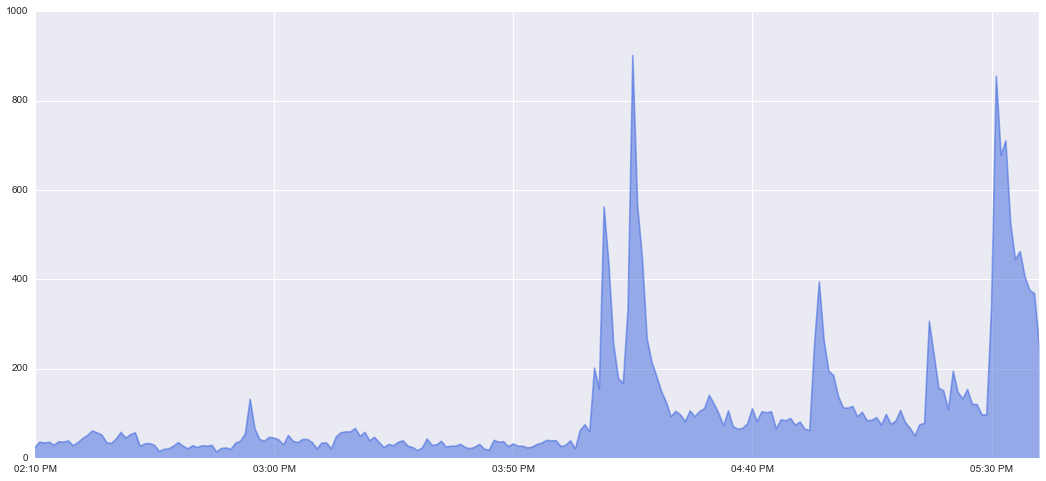

In [64]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1, 1, 1)
cubs1m.plot(kind='area', color='royalblue', alpha=0.5)

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

stop = stopwords.words('english')
text = cleanDF['text']

In [14]:
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

filtered_tokens = [w for w in tokens if not w in stop]
freq_dist = nltk.FreqDist(filtered_tokens)

In [15]:
freq_series = pd.Series(freq_dist)
freq_series1 = freq_series.order(ascending=False)[:25]

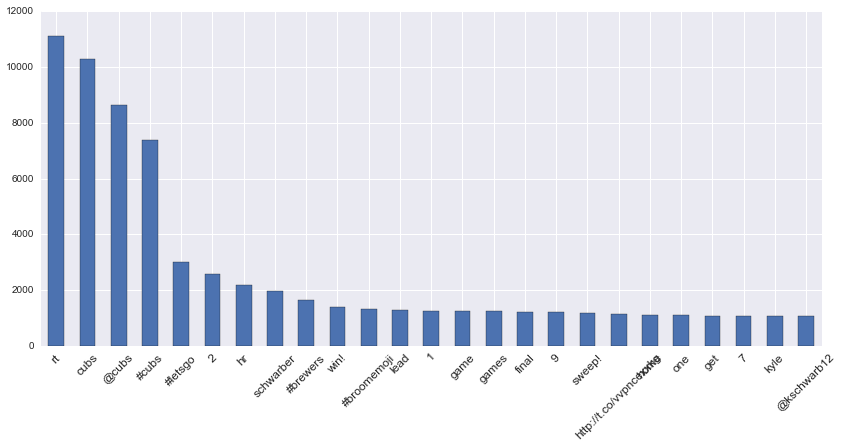

In [63]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(1,1,1)
freq_series1.plot(kind = 'bar', use_index=True)
ax.set_xticklabels(freq_series1.index, rotation=45, fontsize = 12)

#maybe normalize these so they are a percentage of the total tweets?

In [18]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [24]:
len(cleanDF)

22396

In [38]:
#subtracted 4 hours from the created_at time to make sure it was aligned with eastern time. 
#It is a Timestamp object, not a strftime converted string.

cleanDF.created_at = map(lambda x: x - timedelta(hours=4), cleanDF.created_at)
print 'Done here.'

Done here.


/Users/yongcho822/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
cleanDF.head()

,created_at,text,hashtag,user,geo,source
created_at,,,,,,
2015-08-13 14:10:06-04:00,2015-08-13 14:10:06,$50 on U8.5 Cubs game @ 2\n\n@nickgiglioo,None,PPBets365,None,Twitter for iPhone
2015-08-13 14:10:07-04:00,2015-08-13 14:10:07,If you catch a home run ball and throw it back...,"[Cubs, baseball]",keith_saunders,None,Echofon
2015-08-13 14:10:09-04:00,2015-08-13 14:10:09,"Protect their cubs, that's what mother bears d...",None,lthearted1,None,Twitter Web Client
2015-08-13 14:10:14-04:00,2015-08-13 14:10:14,@MLBrendan @alarre1 @JeffPassan Cubs are a nat...,None,jw_mike,None,Twitter for iPhone
2015-08-13 14:10:14-04:00,2015-08-13 14:10:14,RT @stoolpresidente: LOL. @BarstoolBigCat @NES...,None,patowens77,None,Twitter for iPhone


In [66]:
with open('cubtweetsDF.pkl','w') as pkl:
    pickle.dump(cleanDF, pkl)
print 'Done pickling out dataframe.'

Done pickling out dataframe.


In [40]:
letstest = cleanDF.copy(deep=True)

In [52]:
#trying just textblob.sentiment.polarity and running it on all of the text column

doesthiswork = letstest['text'].map(lambda x: TextBlob(x).sentiment.polarity)

In [57]:
#resample by minute intervals/bins and find the mean polarity of all the tweets in that interval/bin
doesthiswork2 = doesthiswork.resample('1t', how='mean')

In [59]:
#making the index nice and pretty for plotting purposes
doesthiswork2.index = map(lambda x:x.strftime('%I:%M %p'), doesthiswork2.index)

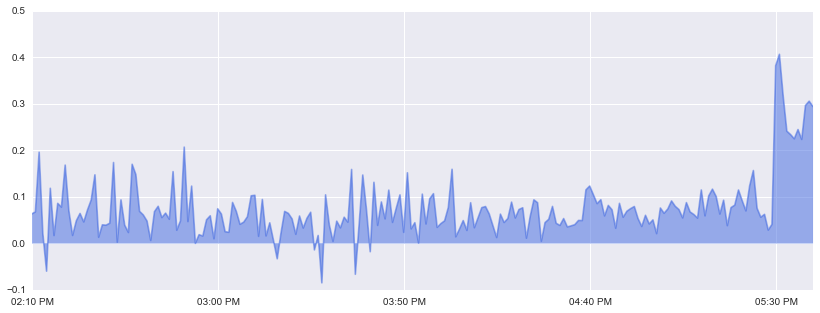

In [62]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1, 1, 1)
doesthiswork2.plot(kind='area', stacked=False, color='royalblue', alpha=0.5)